In [1]:
import glob
import os
import gc

import xarray as xr
xr.set_options(keep_attrs=True)

import cartopy
from cartopy import crs as ccrs

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import colors

from tqdm.notebook import tqdm

import colormaps as cmo 

from cdo import *
cdo = Cdo()
cdo.cleanTempDir()


from rich import print as rprint

%load_ext rich

import xcdat as xc
import xesmf as xe
import cf_xarray as cfxr
import numpy as np
import pandas as pd
import scipy as sc

In [2]:
west = 106.2
east = 107.15
north = -5.1
south = -6.2

#west = 106.3640
#east = 107.1060
#north = -5.1350
#south = -6.1810

extent = [west, east, south, north]

gridinfo = '/home/edskywalker/Documents/Projects/Github/HAB_JakartaBay/Configs/IMBER_Sen3_grid_3.txt'
comp = dict(zlib=True, complevel=4)

rprint("Map extent: ", extent)

Map extent: 
[106.2, 107.15, -6.2, -5.1]

## BIOGEOCHEMISTRY

In [3]:
folder_chl = glob.glob('/home/edskywalker/Documents/Programming/Python/Input/Sentinel3/*BIOGEOCHEMISTRY.nc')
folder_chl.sort()

In [4]:
rprint(folder_chl[0])
rprint(folder_chl[-1])

/home/edskywalker/Documents/Programming/Python/Input/Sentinel3/S3A_OL_2_WFR_20171103T025518_20171103T025818_0179_02
4_089_3059_BIOGEOCHEMISTRY.nc

/home/edskywalker/Documents/Programming/Python/Input/Sentinel3/S3B_OL_2_WFR_20231226T023903_20231226T024203_0180_08
7_374_3060_BIOGEOCHEMISTRY.nc

In [5]:
for index, lis in tqdm(enumerate(folder_chl, start=0), total=len(folder_chl), desc='Processed'):
    try:
        datanya = xr.open_dataset(lis, engine='h5netcdf')
        datanya = datanya.cf.add_bounds(['lon','lat'])
        datanya = cdo.remapcon(gridinfo, input = datanya, returnXDataset = True)
        file_name = f'/mnt/d/Temp/chl_raw_{index:04d}.nc'
        datanya.to_netcdf(
            file_name,
            format = 'NETCDF4',
            unlimited_dims = 'time',
            encoding={var: comp for var in datanya.data_vars}
            )
        datanya.close()
        cdo.cleanTempDir()
        gc.collect()
    except:
        continue

Processed:   0%|          | 0/1966 [00:00<?, ?it/s]

Error in calling operator remapcon with:
>>> cdo -O -s -f nc -remapcon,/home/edskywalker/Documents/Projects/Github/HAB_JakartaBay/Configs/IMBER_Sen3_grid_3.txt /tmp/cdoPyfojrqsoj /tmp/cdoPyoc4s7w9s<<<
STDOUT:
STDERR:cdo    remapcon: Open failed on >/tmp/cdoPyfojrqsoj<
                 No such file or directory

Error in calling operator remapcon with:
>>> cdo -O -s -f nc -remapcon,/home/edskywalker/Documents/Projects/Github/HAB_JakartaBay/Configs/IMBER_Sen3_grid_3.txt /tmp/cdoPyezsjzk7o /tmp/cdoPyje8nekmh<<<
STDOUT:
STDERR:cdo    remapcon: Open failed on >/tmp/cdoPyezsjzk7o<
                 No such file or directory

Error in calling operator remapcon with:
>>> cdo -O -s -f nc -remapcon,/home/edskywalker/Documents/Projects/Github/HAB_JakartaBay/Configs/IMBER_Sen3_grid_3.txt /tmp/cdoPygwbu1uti /tmp/cdoPynnm_9c57<<<
STDOUT:
STDERR:cdo    remapcon: Open failed on >/tmp/cdoPygwbu1uti<
                 No such file or directory

Error in calling operator remapcon with:
>>> cdo -O -s -f nc 

In [6]:
lis_chl = glob.glob('/mnt/d/Temp/chl_*.nc')

chl_concat = cdo.mergetime(input=lis_chl, returnXDataset=True)
chl_concat = chl_concat.sortby('time')

rprint(chl_concat)

<xarray.Dataset> Size: 3GB
Dimensions:  (time: 1158, lon: 451, lat: 522)
Coordinates:
  * time     (time) datetime64[ns] 9kB 2017-11-07T02:53:03.994778 ... 2023-12...
  * lon      (lon) float64 4kB 106.2 106.2 106.2 106.2 ... 107.1 107.1 107.1
  * lat      (lat) float64 4kB -5.099 -5.102 -5.104 ... -6.195 -6.197 -6.199
Data variables:
    chl_nn   (time, lat, lon) float32 1GB ...
    chl_oc   (time, lat, lon) float32 1GB ...
    tsm_nn   (time, lat, lon) float32 1GB ...
Attributes:
    CDI:          Climate Data Interface version 2.4.0 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Wed Jun 19 18:46:22 2024: cdo -O -s -f nc -mergetime /mnt/d...
    CDO:          Climate Data Operators version 2.4.0 (https://mpimet.mpg.de...

In [7]:
if os.path.exists('/mnt/d/Documents/Programming/Python/Output/IMBER/Data/chl_sentinel3_concatenated.nc'):
    os.remove('/mnt/d/Documents/Programming/Python/Output/IMBER/Data/chl_sentinel3_concatenated.nc')

chl_concat.to_netcdf(
    '/mnt/d/Documents/Programming/Python/Output/IMBER/Data/chl_sentinel3_concatenated.nc', 
    format = 'NETCDF4',
    unlimited_dims = 'time',
    encoding={var: comp for var in chl_concat.data_vars}
    )

In [8]:
chl_exported = xr.open_dataset('/mnt/d/Documents/Programming/Python/Output/IMBER/Data/chl_sentinel3_concatenated.nc')

rprint(chl_exported)

<xarray.Dataset> Size: 3GB
Dimensions:  (time: 1158, lon: 451, lat: 522)
Coordinates:
  * time     (time) datetime64[ns] 9kB 2017-11-07T02:53:03.994778 ... 2023-12...
  * lon      (lon) float64 4kB 106.2 106.2 106.2 106.2 ... 107.1 107.1 107.1
  * lat      (lat) float64 4kB -5.099 -5.102 -5.104 ... -6.195 -6.197 -6.199
Data variables:
    chl_nn   (time, lat, lon) float32 1GB ...
    chl_oc   (time, lat, lon) float32 1GB ...
    tsm_nn   (time, lat, lon) float32 1GB ...
Attributes:
    CDI:          Climate Data Interface version 2.4.0 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Wed Jun 19 18:46:22 2024: cdo -O -s -f nc -mergetime /mnt/d...
    CDO:          Climate Data Operators version 2.4.0 (https://mpimet.mpg.de...

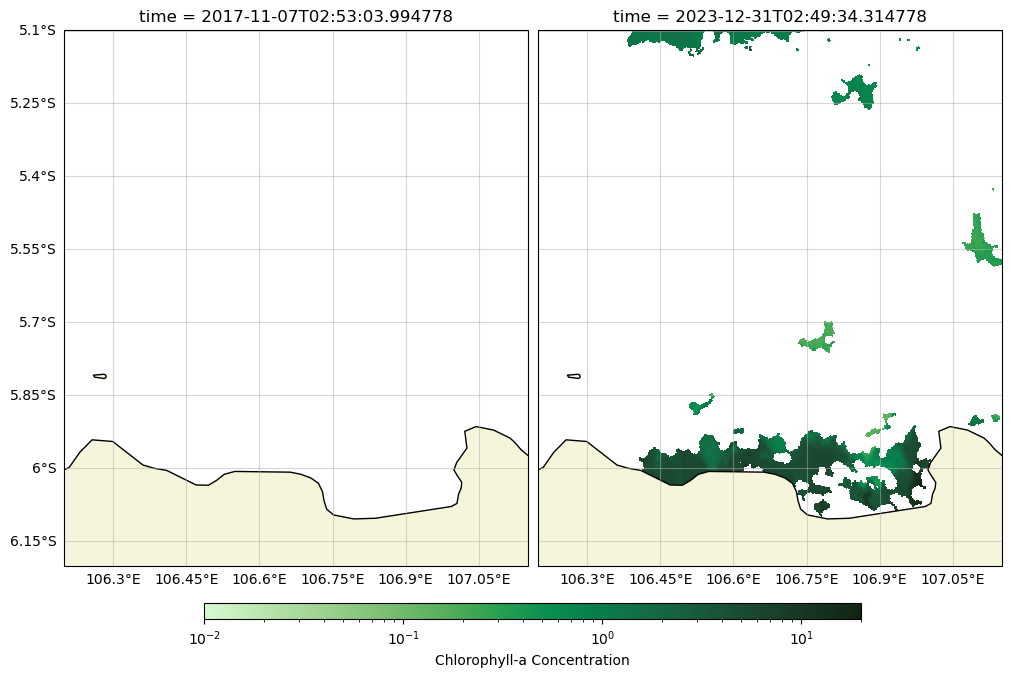

In [10]:
im = cm.ScalarMappable(norm=colors.LogNorm(0.01,20), cmap=cmo.algae)

sets = 10 ** chl_exported.chl_nn

fig, ax = plt.subplots(figsize=[10,8], ncols=2, layout='constrained', subplot_kw=dict(projection=ccrs.Mercator()))

for i in range(2):
#    ax[i].set_extent(extent, crs=ccrs.PlateCarree())
    ax[i].add_feature(cartopy.feature.LAND.with_scale('10m'), facecolor = 'beige', edgecolor='black', zorder = 1)

    ini = ax[i].gridlines(draw_labels = True, alpha=0.5)
    ini.top_labels = False
    ini.right_labels = False
    if not i==0:
        ini.left_labels=False


sets.isel(time=0).plot(ax=ax[0], add_colorbar=False, norm=colors.LogNorm(0.01,20), cmap=cmo.algae, zorder=0, transform=ccrs.PlateCarree())
sets.isel(time=-1).plot(ax=ax[1], add_colorbar=False, norm=colors.LogNorm(0.01,20), cmap=cmo.algae, zorder=0, transform=ccrs.PlateCarree())

cbar = plt.colorbar(im, shrink=0.7, aspect=40, pad=0.02, orientation = 'horizontal', label = 'Chlorophyll-a Concentration',ax=ax[0:])

In [11]:
cdo.cleanTempDir()

chl_exported.close()

for file in lis_chl:
    os.remove(file)

## REFLECTANCE

In [12]:
folder_ref = glob.glob('/home/edskywalker/Documents/Programming/Python/Input/Sentinel3/*REFLECTANCES.nc')
folder_ref.sort()

In [13]:
for index, lis in tqdm(enumerate(folder_ref, start=0), total=len(folder_ref), desc='Processed'):
    try:
        datanya = xr.open_dataset(lis, engine='h5netcdf')
        datanya = datanya.cf.add_bounds(['lon','lat'])
        datanya = cdo.remapcon(gridinfo, input = datanya, returnXDataset = True)
        file_name = f'/mnt/d/Temp/ref_raw_{index:04d}.nc'
        datanya.to_netcdf(
            file_name,
            format = 'NETCDF4',
            unlimited_dims = 'time',
            encoding={var: comp for var in datanya.data_vars}
            )
        datanya.close()
        cdo.cleanTempDir()
        gc.collect()
    except:
        continue

Processed:   0%|          | 0/1966 [00:00<?, ?it/s]

In [14]:
lis_ref = glob.glob('/mnt/d/Temp/ref*.nc')

ref_concat = xr.open_mfdataset(lis_ref)
ref_concat = ref_concat.sortby('time')

rprint(ref_concat)

<xarray.Dataset> Size: 13GB
Dimensions:  (time: 1932, lon: 451, lat: 522)
Coordinates:
  * time     (time) datetime64[ns] 15kB 2017-11-03T02:56:48.405115 ... 2023-1...
  * lon      (lon) float64 4kB 106.2 106.2 106.2 106.2 ... 107.1 107.1 107.1
  * lat      (lat) float64 4kB -5.099 -5.102 -5.104 ... -6.195 -6.197 -6.199
Data variables:
    Oa06     (time, lat, lon) float32 2GB dask.array<chunksize=(1, 522, 451), meta=np.ndarray>
    Oa07     (time, lat, lon) float32 2GB dask.array<chunksize=(1, 522, 451), meta=np.ndarray>
    Oa08     (time, lat, lon) float32 2GB dask.array<chunksize=(1, 522, 451), meta=np.ndarray>
    Oa09     (time, lat, lon) float32 2GB dask.array<chunksize=(1, 522, 451), meta=np.ndarray>
    Oa10     (time, lat, lon) float32 2GB dask.array<chunksize=(1, 522, 451), meta=np.ndarray>
    Oa11     (time, lat, lon) float32 2GB dask.array<chunksize=(1, 522, 451), meta=np.ndarray>
    Oa12     (time, lat, lon) float32 2GB dask.array<chunksize=(1, 522, 451), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.4.0 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Wed Jun 19 19:25:55 2024: cdo -O -s -f nc -remapcon,/home/e...
    CDO:          Climate Data Operators version 2.4.0 (https://mpimet.mpg.de...

In [15]:
if os.path.exists('/mnt/d/Documents/Programming/Python/Output/IMBER/Data/ref_sentinel3_concatenated.nc'):
    os.remove('/mnt/d/Documents/Programming/Python/Output/IMBER/Data/ref_sentinel3_concatenated.nc')

ref_concat.to_netcdf(
    '/mnt/d/Documents/Programming/Python/Output/IMBER/Data/ref_sentinel3_concatenated.nc', 
    format = 'NETCDF4',
    unlimited_dims = 'time',
    encoding={var: comp for var in ref_concat.data_vars}
    )

In [16]:
ref_exported = xr.open_dataset('/mnt/d/Documents/Programming/Python/Output/IMBER/Data/ref_sentinel3_concatenated.nc')

rprint(ref_exported)

<xarray.Dataset> Size: 13GB
Dimensions:  (time: 1932, lon: 451, lat: 522)
Coordinates:
  * time     (time) datetime64[ns] 15kB 2017-11-03T02:56:48.405115 ... 2023-1...
  * lon      (lon) float64 4kB 106.2 106.2 106.2 106.2 ... 107.1 107.1 107.1
  * lat      (lat) float64 4kB -5.099 -5.102 -5.104 ... -6.195 -6.197 -6.199
Data variables:
    Oa06     (time, lat, lon) float32 2GB ...
    Oa07     (time, lat, lon) float32 2GB ...
    Oa08     (time, lat, lon) float32 2GB ...
    Oa09     (time, lat, lon) float32 2GB ...
    Oa10     (time, lat, lon) float32 2GB ...
    Oa11     (time, lat, lon) float32 2GB ...
    Oa12     (time, lat, lon) float32 2GB ...
Attributes:
    CDI:          Climate Data Interface version 2.4.0 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Wed Jun 19 19:25:55 2024: cdo -O -s -f nc -remapcon,/home/e...
    CDO:          Climate Data Operators version 2.4.0 (https://mpimet.mpg.de...

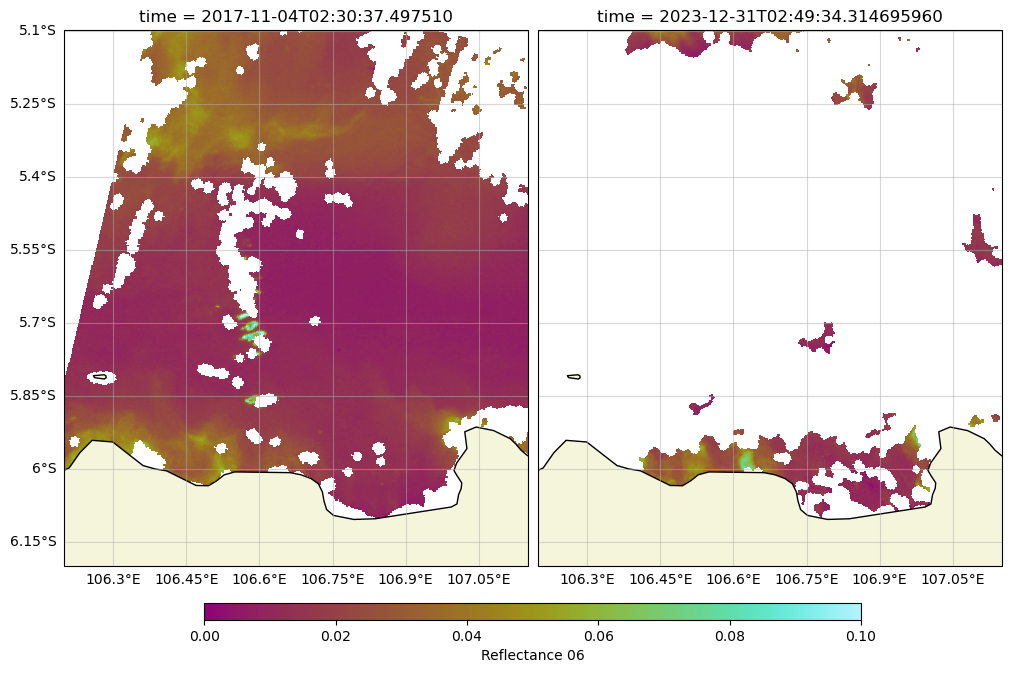

In [17]:
im = cm.ScalarMappable(norm=colors.Normalize(0,0.1), cmap=cmo.hawaii)

fig, ax = plt.subplots(figsize=[10,8], ncols=2, layout='constrained', subplot_kw=dict(projection=ccrs.Mercator()))

for i in range(2):
#    ax[i].set_extent(extent, crs=ccrs.PlateCarree())
    ax[i].add_feature(cartopy.feature.LAND.with_scale('10m'), facecolor = 'beige', edgecolor='black', zorder = 1)

    ini = ax[i].gridlines(draw_labels = True, alpha=0.5)
    ini.top_labels = False
    ini.right_labels = False
    if not i==0:
        ini.left_labels=False

ref_exported.Oa06.isel(time=1).plot.pcolormesh(ax=ax[0], add_colorbar=False, norm=colors.Normalize(0,0.1), cmap=cmo.hawaii, zorder=0, transform=ccrs.PlateCarree())
ref_exported.Oa06.isel(time=-1).plot.pcolormesh(ax=ax[1], add_colorbar=False, norm=colors.Normalize(0,0.1), cmap=cmo.hawaii, zorder=0, transform=ccrs.PlateCarree())

cbar = plt.colorbar(im, shrink=0.7, aspect=40, pad=0.02, orientation = 'horizontal', label = 'Reflectance 06',ax=ax[0:])

In [18]:
cdo.cleanTempDir()

ref_exported.close()

for file in lis_ref:
    os.remove(file)